# Training Model with Deep Learning

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score, explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

In [20]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [21]:
# Google Calab

# from google.colab import drive
# drive.mount('/content/drive')

# df = pd.read_csv('/content/drive/MyDrive/tensorflow/DATA/kc_house_data.csv')

In [22]:
df=pd.read_csv("final_scout_20201204.csv")
df.head()

,price,km,hp,Previous_Owners,Inspection_New,Nr_of_Doors,Nr_of_Seats,Displacement,Gears,Age,...,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Upholstery_Type_Cloth,Upholstery_Type_Part/Full Leather,Upholstery_Color_Black,Upholstery_Color_Brown,Upholstery_Color_Grey,Upholstery_Color_Other
0,15770,56013.000,66.000,2.000,1,5.000,5.000,1422.000,5.000,3.000,...,0,1,0,0,1,0,1,0,0,0
1,14500,80000.000,141.000,1.000,0,3.000,4.000,1798.000,7.000,2.000,...,1,0,0,0,1,0,0,0,1,0
2,14640,83450.000,85.000,1.000,0,4.000,4.000,1598.000,5.000,3.000,...,0,1,0,0,1,0,1,0,0,0
3,14500,73000.000,66.000,1.000,0,3.000,4.000,1422.000,6.000,3.000,...,0,1,0,0,1,0,1,0,0,0
4,16790,16200.000,66.000,1.000,1,5.000,5.000,1422.000,5.000,3.000,...,0,1,0,0,1,0,1,0,0,0


### Scaling and Train Test Split
* Burada Min-Max Scaler kullanacagiz.
* Min-max Scaler outliers sensitivedir. 
* Veride outlier cok ise min-max scaler kullanmamamiz gerekir. yoksa iyi performans alamayiz.
* Elimizde outliers cok ise **`RobustScaler()`** kullanilir. Bu scale metodu outlier insensitivedir.

In [23]:
X = df.drop('price',axis=1).values
y = df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
# scaler = RobustScaler()
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
X_train.shape, X_test.shape

((12732, 144), (3183, 144))

### Creating a Model

In [203]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Activation
# from tensorflow.keras.optimizers import Adam

In [204]:
model = Sequential()

model.add(Dense(144,activation='relu')) #144 feature var, Dense 144 seceriz.
model.add(Dense(72,activation='relu'))
model.add(Dense(24,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1)) # regresyon oldugu icin output layer Dense 1 secilir, aktivation function olmaz.
opt=Adam(lr=0.001)
model.compile(optimizer=opt,loss='mse')

In [205]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

In [206]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=4,epochs=300,
          callbacks=[early_stop])

Epoch 1/300
3183/3183 [==============================] - 4s 1ms/step - loss: 80011827.2085 - val_loss: 6686072.0000
Epoch 2/300
3183/3183 [==============================] - 3s 1ms/step - loss: 6545611.2118 - val_loss: 5155886.5000
Epoch 3/300
3183/3183 [==============================] - 3s 942us/step - loss: 4865298.7382 - val_loss: 5256764.5000
Epoch 4/300
3183/3183 [==============================] - 3s 981us/step - loss: 4371189.1618 - val_loss: 4307204.5000
Epoch 5/300
3183/3183 [==============================] - 3s 937us/step - loss: 3995955.0730 - val_loss: 3607125.7500
Epoch 6/300
3183/3183 [==============================] - 3s 955us/step - loss: 3684367.3156 - val_loss: 3470256.7500
Epoch 7/300
3183/3183 [==============================] - 3s 974us/step - loss: 3491458.6800 - val_loss: 3403424.2500
Epoch 8/300
3183/3183 [==============================] - 3s 951us/step - loss: 3366985.6715 - val_loss: 3089611.2500
Epoch 9/300
3183/3183 [==============================] - 3s 978us/s

# Evaluation

In [207]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 144)               20880     
_________________________________________________________________
dense_41 (Dense)             (None, 72)                10440     
_________________________________________________________________
dense_42 (Dense)             (None, 24)                1752      
_________________________________________________________________
dense_43 (Dense)             (None, 8)                 200       
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 9         
Total params: 33,281
Trainable params: 33,281
Non-trainable params: 0
_________________________________________________________________


In [208]:
# Alternative Summary
# It is working in Google Colab

# from tensorflow.keras.utils import plot_model
# dot_img_file = '/tmp/model_1.png'
# plot_model(model, to_file=dot_img_file, show_shapes=True)

<AxesSubplot:>

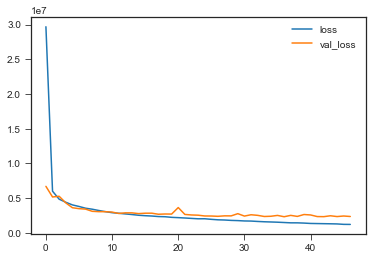

In [209]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
# plt.ticklabel_format(style='plain')
# plt.plot(losses)

In [210]:
# Alternative with seaborn
# loss = model.history.history['loss']
# sns.lineplot(x=range(len(loss)),y=loss)
# plt.title("Training Loss per Epoch");

**Loss-Epoch Graph**

(0.0, 50000000.0)

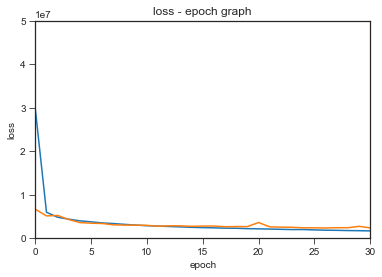

In [211]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0,30]) # focusing on the given x values
ax.set_ylim([0,5e7]) # focusing on the given y values

In [212]:
loss_df.loss.idxmin() 

46

In [213]:
loss_df.loss.min()

1199584.25

In [214]:
loss_df.val_loss.min()

2307133.75

**Evaluation Metrics**

In [215]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    r2score = r2_score(actual, pred)
    print(f"R2 Score: {r2score}",
          f"Mean Absolute Error(MAE): {mae}",
          f"Mean Square Error(MSE): {mse}",
          f"Root Mean Square Error(RMSE): {rmse}",sep="\n")

In [216]:
#Training Data
y_train_pred = model.predict(X_train)
eval_metrics(y_train, y_train_pred)

R2 Score: 0.9817964063420247
Mean Absolute Error(MAE): 717.2005187240443
Mean Square Error(MSE): 994107.1288172553
Root Mean Square Error(RMSE): 997.0492108302656


In [217]:
# Test Data
y_pred = model.predict(X_test)
eval_metrics(y_test, y_pred)

R2 Score: 0.9565998124257487
Mean Absolute Error(MAE): 988.075069982377
Mean Square Error(MSE): 2342203.116786771
Root Mean Square Error(RMSE): 1530.4257959100046


In [218]:
# Alternatively
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

print('training_msa:',training_score,
      '\ntest_msa:', test_score,sep='')

training_msa:994107.5
test_msa:2342203.25


* In the above code, model.evaluate() gives MSE Score. Because, as a loss parametre, we use loss="mse" in model.compile() when we create the model.

In [219]:
explained_variance_score(y_test,y_pred)

0.9569063148659225

> **explained_variance_score**

> hata varyansi ile gercek degerin varyansi arasindaki orani hesaplamak icin kullanilan bir metrik. Modelin veri setindeki farkli varyasyonlari ne kadar iyi aciklayabildigini gosteren puandir. Genellikle 0,6 treshold uzeri olmasi beklenir.

**Let's compare to the real test labels!**

In [220]:
y_test.shape, y_pred.shape

((3183,), (3183, 1))

In [221]:
my_dict={"Actual":y_test, 
         "Pred":y_pred.reshape(-1,)}

compare=pd.DataFrame(my_dict)
compare.sample(5)

,Actual,Pred
326,11790,10196.383
3050,11600,12346.861
1923,16500,16626.203
3137,19900,20157.297
273,17700,17418.738


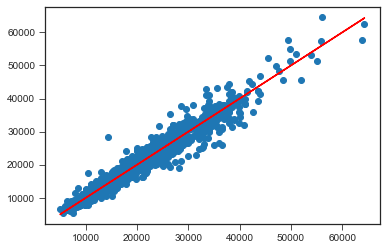

In [222]:
plt.scatter(compare.Actual,compare.Pred)
plt.plot(compare.Actual,compare.Actual,'r');

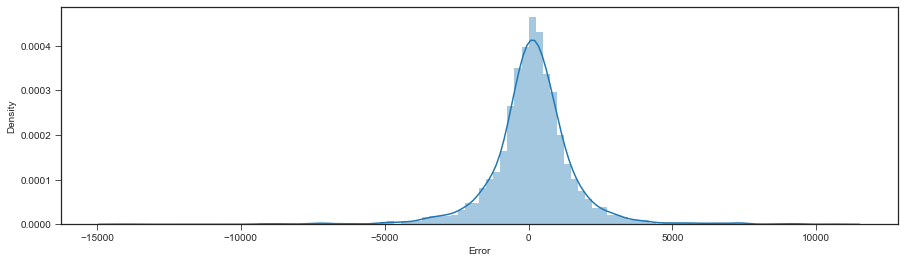

In [223]:
plt.figure(figsize=(15,4))
compare['Error'] = compare['Actual'] - compare['Pred']
sns.distplot(compare['Error'],kde=True,bins=100);

## Predicting on brand new data

In [224]:
df.shape

(15915, 145)

In [225]:
single_car = df.drop('price',axis=1).iloc[0]
single_car = scaler.transform(single_car.values.reshape(-1, 144))

In [226]:
print('Prediction Price: ', *model.predict(single_car)[0], 
      '\nActual Price: ',df.price.iloc[0], sep='')

Prediction Price: 15326.324
Actual Price: 15770


## Saving and Loading a Model
* We dont use pickle for Keras when we save a DL Model.
* Keras has a model loading station itself.
* Google Colab te calisirken model kaydedildiginde sol tarafta gorunur. Model oradan drag&drop ile drive da istenen klasore tasinabilir.
* Lets remember how to save a ML Model

    import pickle
    
    pickle.dump(svm,open("svm","wb"))
    
    svm_model = pickle.load(open("svm","rb"))

In [227]:
model.save('DL_Model.h5')  # creates a HDF5 file 'my_model.h5'
later_model = load_model('DL_Model.h5')

In [233]:
later_model.predict(single_car)[0][0]

15326.324